# RL with and without function approximation


In [1]:
#from IPython import get_ipython
import rlberry.colab_utils.display_setup
from rlberry.colab_utils.display_setup import show_video
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%%javascript
(function(on) {
const e=$( "<a>Setup failed</a>" );
const ns="js_jupyter_suppress_warnings";
var cssrules=$("#"+ns);
if(!cssrules.length) cssrules = $("<style id='"+ns+"' type='text/css'>div.output_stderr { } </style>").appendTo("head");
e.click(function() {
    var s='Showing';  
    cssrules.empty()
    if(on) {
        s='Hiding';
        cssrules.append("div.output_stderr, div[data-mime-type*='.stderr'] { display:none; }");
    }
    e.text(s+' warnings (click to toggle)');
    on=!on;
}).click();
$(element).append(e);
})(true);

<IPython.core.display.Javascript object>

# Preparation

In the coding exercises, you will use a *grid-world* MDP, which is represented in Python using the interface provided by the [Gym](https://gym.openai.com/) library. The cells below show how to interact with this MDP and how to visualize it.


In [3]:
from rlberry.envs import GridWorld

def get_env():
  """Creates an instance of a grid-world MDP."""
  env = GridWorld(
      nrows=5,
      ncols=7,
      reward_at = {(0, 6):1.0},
      walls=((0, 4), (1, 4), (2, 4), (3, 4)),
      success_probability=0.9,
      terminal_states=((0, 6),)
  )
  return env

def render_policy(env, policy=None, horizon=50):
  """Visualize a policy in an environment

  Args:
    env: GridWorld
        environment where to run the policy
    policy: np.array
        matrix mapping states to action (Ns).
        If None, runs random policy.
    horizon: int
        maximum number of timesteps in the environment.
  """
  env.enable_rendering()
  state = env.reset()                       # get initial state
  for timestep in range(horizon):
      if policy is None:
        action = env.action_space.sample()  # take random actions
      else:
        action = policy[state]
      next_state, reward, is_terminal, info = env.step(action)
      state = next_state
      if is_terminal:
        break
  # save video and clear buffer
  env.save_video('./videos/gw.mp4', framerate=5)
  env.clear_render_buffer()
  env.disable_rendering()
  # show video
  show_video('./videos/gw.mp4')


In [4]:
# Create an environment and visualize it
env = get_env()
render_policy(env)  # visualize random policy

# The reward function and transition probabilities can be accessed through
# the R and P attributes:
print(f"Shape of the reward array = (S, A) = {env.R.shape}")
print(f"Shape of the transition array = (S, A, S) = {env.P.shape}")
print(f"Reward at (s, a) = (1, 0): {env.R[1, 0]}")
print(f"Prob[s\'=2 | s=1, a=0]: {env.P[1, 0, 2]}")
print(f"Number of states and actions: {env.Ns}, {env.Na}")

# The states in the griworld correspond to (row, col) coordinates.
# The environment provides a mapping between (row, col) and the index of
# each state:
print(f"Index of state (1, 0): {env.coord2index[(1, 0)]}")
print(f"Coordinates of state 5: {env.index2coord[5]}")

ffmpeg version 4.2.4-1ubuntu0.1 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.3.0-10ubuntu2)
  configuration: --prefix=/usr --extra-version=1ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-l

Shape of the reward array = (S, A) = (31, 4)
Shape of the transition array = (S, A, S) = (31, 4, 31)
Reward at (s, a) = (1, 0): 0.0
Prob[s'=2 | s=1, a=0]: 0.04999999999999999
Number of states and actions: 31, 4
Index of state (1, 0): 6
Coordinates of state 5: (0, 6)


# Finding the optimal policy

In [4]:
def value_iteration(P, R, gamma=0.95, tol=1e-3):
    """
    Args:
        P: np.array
            transition matrix (NsxNaxNs)
        R: np.array
            reward matrix (NsxNa)
        gamma: float
            discount factor
        tol: float
            precision of the solution
    Return:
        Q: final Q-function (at iteration n)
        greedy_policy: greedy policy wrt Qn
        Qfs: all Q-functions generated by the algorithm (for visualization)
    """
    Ns, Na = R.shape
    Q = np.zeros((Ns, Na))
    V = np.zeros(Ns)
    Qfs = [Q]
    # ====================================================
	  # YOUR IMPLEMENTATION HERE 
    #
    while True:
        TQ = np.zeros((Ns, Na))
        for ss in range(Ns):
            for aa in range(Na):
                TQ[ss, aa] = R[ss, aa] + gamma * P[ss, aa, :].dot(V)
        V = TQ.max(axis=1)

        if np.abs(TQ-Q).max() < tol:
            break
        Q = TQ
        Qfs.append(Q)

    greedy_policy = np.argmax(Q, axis=1)
    # ====================================================
    return Q, greedy_policy, Qfs

### Testing your code

In [5]:
# Parameters
tol = 1e-5
gamma = 0.95

# Environment
env = get_env()

# run value iteration to obtain Q-values
VI_Q, VI_greedypol, all_qfunctions = value_iteration(env.P, env.R, gamma=gamma, tol=tol)

# render the policy
print("[VI]Greedy policy: ")
render_policy(env, VI_greedypol)

[VI]Greedy policy: 


ffmpeg version 4.2.4-1ubuntu0.1 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.3.0-10ubuntu2)
  configuration: --prefix=/usr --extra-version=1ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-l

# Collecting a database of transition

To run Fitted-Q Iteration, we will need a database of transitions that convers the MDP well enough. We first compare two ways of collecting such a dataset, given in the code below. 


In [6]:
def get_random_policy_dataset(env, n_samples):
  """Get a dataset following a random policy to collect data."""
  states = []
  actions = []
  rewards = []
  next_states = []
  
  state = env.reset()
  for _ in range(n_samples):
    action = env.action_space.sample()
    next_state, reward, is_terminal, info = env.step(action)
    states.append(state)
    actions.append(action)
    rewards.append(reward)
    next_states.append(next_state)
    # update state
    state = next_state
    if is_terminal:
      state = env.reset()

  dataset = (states, actions, rewards, next_states)
  return dataset

def get_uniform_dataset(env, n_samples):
  """Get a dataset by uniformly sampling states and actions."""
  states = []
  actions = []
  rewards = []
  next_states = []
  for _ in range(n_samples):
    state = env.observation_space.sample()
    action = env.action_space.sample()
    next_state, reward, is_terminal, info = env.sample(state, action)
    states.append(state)
    actions.append(action)
    rewards.append(reward)
    next_states.append(next_state)

  dataset = (states, actions, rewards, next_states)
  return dataset


# Collect two different datasets
num_samples = 500
env = get_env()
dataset_1 = get_random_policy_dataset(env, num_samples)
dataset_2 = get_uniform_dataset(env, num_samples)


For each of the datasets that are built:

1. Estimate the transitions and the rewards, $\hat{P}$ and $\hat{R}$.
2. Compute the optimal value function and the optimal policy with respect to the estimated MDP (defined by $\hat{P}$ and $\hat{R}$), which we denote by $\hat{\pi}$ and $\hat{V}$.
3. Numerically compare the performance of $\hat{\pi}$ and $\pi^\star$ (the true optimal policy), and the error between $\hat{V}$ and $V^*$ (the true optimal value function).

Which of the two data collection methods do you think is better? Why?

In [7]:
def estimate_mdp(dataset, Ns, Na):
  num_samples = len(dataset[0])
  P_hat = np.zeros((Ns, Na, Ns))
  N_sas = np.zeros((Ns, Na, Ns))
  N_sa = np.zeros((Ns, Na))
  R_sa = np.zeros((Ns, Na))
  for state, action, reward, next_state in zip(*dataset):
    N_sas[state, action, next_state] += 1
    N_sa[state, action] += 1
    R_sa[state, action] += reward
  for ns in range(Ns):
    P_hat[:, :, ns] = N_sas[:, :, ns] / np.maximum(1, N_sa)
    R_hat = R_sa / np.maximum(1, N_sa)
  return P_hat, R_hat

P_hat_1, R_hat_1 = estimate_mdp(dataset_1, env.Ns, env.Na)
P_hat_2, R_hat_2 = estimate_mdp(dataset_2, env.Ns, env.Na)

Q_true, pi_true, _ = value_iteration(env.P, env.R, gamma=gamma, tol=tol)
Q_hat_1, pi_hat_1, _ = value_iteration(P_hat_1, R_hat_1, gamma=gamma, tol=tol)
Q_hat_2, pi_hat_2, _ = value_iteration(P_hat_2, R_hat_2, gamma=gamma, tol=tol)

print(f"Error with random policy dataset: {np.abs(Q_hat_1-Q_true).max()}")
print(f"Error with uniform dataset: {np.abs(Q_hat_2-Q_true).max()}")

render_policy(env, pi_hat_1, horizon=100)
render_policy(env, pi_hat_2, horizon=100)

Error with random policy dataset: 19.999805535117428
Error with uniform dataset: 14.944042515764233


ffmpeg version 4.2.4-1ubuntu0.1 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.3.0-10ubuntu2)
  configuration: --prefix=/usr --extra-version=1ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-l

ffmpeg version 4.2.4-1ubuntu0.1 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.3.0-10ubuntu2)
  configuration: --prefix=/usr --extra-version=1ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-l

# Larger gridworlds: Fitted-Q

We will now consider a larger Gridworld, in which standard reinforcement learning algorithm like Q-Learning will typically take a very long time to converge.

In [8]:
def get_large_gridworld():
  """Creates an instance of a grid-world MDP with more states."""
  walls = [(ii, 10) for ii in range(15) if (ii != 7 and ii != 8)]
  env = GridWorld(
      nrows=15,
      ncols=15,
      reward_at = {(14, 14):1.0},
      walls=tuple(walls),
      success_probability=0.9,
      terminal_states=((14, 14),)
  )
  return env

env = get_large_gridworld()
render_policy(env)

ffmpeg version 4.2.4-1ubuntu0.1 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.3.0-10ubuntu2)
  configuration: --prefix=/usr --extra-version=1ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-l

Given a datset $(s_i, a_i, r_i, s_i')$ of (states, actions, rewards, next states), the Fitted Q-Iteration (FQI) algorithm proceeds as follows:


* We start from a $Q$ function $Q_0 \in \mathcal{F}$, where $\mathcal{F}$ is a function space;
* At every iteration $k$, we compute $Q_{k+1}$ as:

$$
Q_{k+1}\in\arg\min_{f\in\mathcal{F}} \frac{1}{2}\sum_{i=1}^N
\left(
  f(s_i, a_i) - y_i^k
\right)^2 + \lambda \Omega(f)
$$
where $y_i^k = r_i + \gamma \max_{a'}Q_k(s_i', a')$, $\Omega(f)$ is an (optional) regularization term and $\lambda > 0$ is the regularization coefficient.


We will implement FQI with *linear* function approximation and assume a state feature map $\phi : S \rightarrow \mathbb{R}^d$. We define $\mathcal{F}$ to be the parametric family of $Q$ functions $Q_\theta(s,a) = \phi(s)^T\theta_a$ for $\theta_a\in\mathbb{R}^d$. 


We propose below to implement the feature map as a class whose method "map" applied to a state $s$ return $\phi(s)$. 

How are the features constructed? You may propose other features map(s) later to see their impact on the algorithm. 

**You may add a method "Q_table" which takes as an input a vector $\theta \in \mathbb{R}^{d\times A}$ parameterizing the Q-function and outputs the corresponding Q table in $\mathbb{R}^{S \times A}$.**

In [9]:
class FeatureMap:
    def __init__(self, env, dim=15, sigma=0.25):
        self.index2coord = env.index2coord
        self.n_states = env.Ns
        self.n_actions = env.Na
        self.dim = dim
        self.sigma = sigma

        n_rows = env.nrows
        n_cols = env.ncols

        # build uniform discretization 
        m=int(np.floor(np.sqrt(self.dim)))
        # X and Y coordinates of the centers
        XS, YS = np.meshgrid(np.linspace(0.01,0.99, m),np.linspace(0.01,0.99, m))
        XS=XS.flatten()
        YS=YS.flatten()
    
        tot = m*m
        while (tot < self.dim):
            XS = np.hstack((XS,np.random.rand()))
            YS = np.hstack((YS,np.random.rand()))
            tot +=1
        #print(np.size(XS))
           
        # build feature matrix 
        features = np.zeros((self.dim,self.n_states))
    
        for d in range(self.dim):
            xd = XS[d]
            yd = YS[d]
            for ii in range(self.n_states):
                row_ii, col_ii = self.index2coord[ii]
                x_ii = row_ii / n_rows
                y_ii = col_ii / n_cols
                dist = np.sqrt((xd - x_ii) ** 2.0 + (yd - y_ii) ** 2.0)
                features[d, ii] = np.exp(-(dist / sigma) ** 2.0)
    
        self.feats = features
    
    def map(self, observation):
        feat = self.feats[:, observation].copy()
        return feat

    def Q_table(self,theta):
        Q = np.zeros((self.n_states, self.n_actions))
        for ss in range(self.n_states):
            state_feat = self.map(ss)
            Q[ss, :] = state_feat @ theta
        return Q
    


In [14]:
class SimilarityFeatureMap:
  """Create features for state-action pairs
 
  Args:
    dim: int
      Feature dimension
    sigma: float
      RBF kernel bandwidth
  """
  def __init__(self, env, dim=15, sigma=0.25):
    self.index2coord = env.index2coord 
    self.n_states = env.Ns
    self.n_actions = env.Na
    self.dim = dim
    self.sigma = sigma

    n_rows = env.nrows
    n_cols = env.ncols

    # build similarity matrix
    sim_matrix = np.zeros((self.n_states, self.n_states))
    for ii in range(self.n_states):
        row_ii, col_ii = self.index2coord[ii]
        x_ii = row_ii / n_rows
        y_ii = col_ii / n_cols
        for jj in range(self.n_states):
            row_jj, col_jj = self.index2coord[jj]
            x_jj = row_jj / n_rows
            y_jj = col_jj / n_cols
            dist = np.sqrt((x_jj - x_ii) ** 2.0 + (y_jj - y_ii) ** 2.0)
            sim_matrix[ii, jj] = np.exp(-(dist / sigma) ** 2.0)

    # factorize similarity matrix to obtain features
    uu, ss, vh = np.linalg.svd(sim_matrix, hermitian=True)
    self.feats = vh[:dim, :]

  def map(self, observation):
    feat = self.feats[:, observation].copy()
    return feat


This code is to get a sense of what is inside a feature map 

In [10]:
#feat_map = SimilarityFeatureMap(env)
feat_map = FeatureMap(env)

# The features have dimension (feature_dim).
feature_example = feat_map.map(1) # feature representation of s=1
print(feature_example)

# Initial vector theta representing the Q function
theta = np.random.rand(feat_map.dim, env.action_space.n)
print(theta.shape)

Q=feat_map.Q_table(theta)
print(Q[1,:])

[9.48401088e-01 1.73983870e-02 1.46978756e-07 4.94870409e-02
 9.07838150e-04 7.66926968e-09 1.18910324e-06 2.18140602e-08
 1.84281648e-13 1.21860602e-01 6.76910520e-02 5.04047418e-05
 2.36670094e-11 6.52468704e-02 1.64789814e-07]
(15, 4)
[0.94006375 1.03241998 1.03622453 0.12265088]


**Implement Linear Fitted Q Iteration, taking as an input a feature map a number of iterations and the number of samples used in the training database (shared accross iterations).** 

For the regression problem, we propose to use $\frac{1}{2}\sum_a ||\theta_a||_2^2$ as the regularization term. Assuming that we have a given dataset of $N$ tuples of the form $(s_i, a_i, r_i, s_i')$ and we are at the $k$-th iteration. Let $\theta_k \in\mathbb{R}^{d \times A}$ be our current parameter. You will need to derive the closed-form update to find $\theta_{k+1}$.


In [11]:
def linear_fqi(env, feat_map, num_iterations,n_samples = 10000,lambd=0.1,gamma=0.95):
    # construct the dataset of transitions
    dataset = get_uniform_dataset(env, n_samples)
    
    theta = np.zeros((feat_map.dim, env.Na))
    
    # design matrix M[a,:,:] is the design matrix of the a-th regression problem
    M = np.zeros((env.Na, feat_map.dim, feat_map.dim))
    for state, action, reward, next_state in zip(*dataset):
        state_feat = feat_map.map(state).reshape(-1, 1)
        M[action] += state_feat @ state_feat.T
    
    for it in range(num_iterations):
        # build targets for linear regression
        b = np.zeros((env.Na, feat_map.dim))
        for state, action, reward, next_state in zip(*dataset):
            state_feat = feat_map.map(state)
            next_state_feat = feat_map.map(next_state)
            target = reward + gamma * (next_state_feat @ theta).max()
            b[action] += state_feat * target
        # update theta
        for aa in range(env.Na):
            theta[:, aa] = np.linalg.solve(M[aa] + lambd * np.eye(feat_map.dim), b[aa])
        if (it + 1) % 10 == 0:
            print(f"finished iteration {it+1}")
    return theta


Running the algorithm and visualizing the value and policies that are learnt.

finished iteration 10
finished iteration 20
finished iteration 30
finished iteration 40
finished iteration 50
finished iteration 60
finished iteration 70
finished iteration 80
finished iteration 90
finished iteration 100


ffmpeg version 4.2.4-1ubuntu0.1 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.3.0-10ubuntu2)
  configuration: --prefix=/usr --extra-version=1ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-l

Error on the value: 9.418069764235767


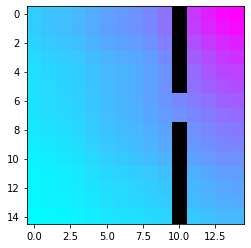

In [12]:
env = get_large_gridworld()
feat_map = FeatureMap(env, dim=65, sigma=0.2)

# FQI
theta = linear_fqi(env, feat_map, num_iterations=100,n_samples=10000)

# Compute and run greedy policy
Q_fqi = feat_map.Q_table(theta)
V_fqi = Q_fqi.max(axis=1)
policy = Q_fqi.argmax(axis=1)

render_policy(env, policy, horizon=100)
img = env.get_layout_img(V_fqi)
plt.imshow(img)

Q_true, pi_true, _ = value_iteration(env.P, env.R, gamma=gamma, tol=tol)
V_true = Q_true.max(axis=1)

print("Error on the value:",np.abs(V_fqi-V_true).max())


# Beyond Fitted-Q Iteration

You may implement other algorithms: Q-Learning to check that it fails on the large gridworlds or Least Square Policy Iteration to try another feature-based algorithm that we saw in class. 